In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importer les packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#collecter les datasets
files=[file for file in os.listdir(r'C:\Users\Ghassen\Desktop\Analyse les ventes\Sales_Data')]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
path=r'C:\Users\Ghassen\Desktop\Analyse les ventes\Sales_Data'

all_data=pd.DataFrame()

for file in files:
    current_data=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_data])
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [5]:
all_data.to_csv(path+'/all_data.csv',index=False)

In [6]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
all_data.isna().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [9]:
#supprimer les valeurs manquantes
all_data=all_data.dropna(how='all')
all_data.shape

(372610, 6)

<h2>Question:Quel est le mois durant lequel nous avons réalisé le meuilleur chiffre d'affaire ? </h2>

In [10]:
def month(x):
    return x.split('/')[0]

In [11]:
all_data['Month']=all_data['Order Date'].apply(month)

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [13]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [14]:
all_data[all_data.Month=='Order Date'].shape

(710, 7)

In [15]:
all_data=all_data[all_data.Month!='Order Date']

In [16]:
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [17]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [18]:
all_data.Month=all_data.Month.astype('int64')
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int64')
all_data['Price Each']=all_data['Price Each'].astype('float64')
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [19]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [20]:
all_data.groupby(all_data['Month'])['Sales'].sum().sort_values(ascending=False)

Month
12    9226886.68
10    7473453.76
4     6781340.48
11    6399206.40
5     6305213.50
3     5614200.76
7     5295551.52
6     5155604.52
8     4488935.76
2     4404044.84
9     4195120.26
1     3644513.46
Name: Sales, dtype: float64

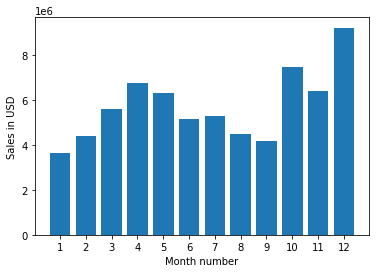

In [21]:
months=range(1,13)
plt.bar(months,all_data.groupby(all_data['Month'])['Sales'].sum())
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales in USD')
plt.show()

### Réponse:Decembre est le mois que nous avons réalisé le meuilleur chiffre d'affaire (Noel)

<h2>Question:Dans quelle ville nous avons enregistré un maximum de commandes ?</h2> 

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [23]:
def city(x):
    return x.split(', ')[1]

In [24]:
all_data['City']=all_data['Purchase Address'].apply(city)

In [25]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [26]:
all_data.groupby('City')['City'].count().sort_values(ascending=False)

City
San Francisco    89464
Los Angeles      59210
New York City    49752
Boston           39868
Atlanta          29762
Dallas           29640
Seattle          29464
Portland         24930
Austin           19810
Name: City, dtype: int64

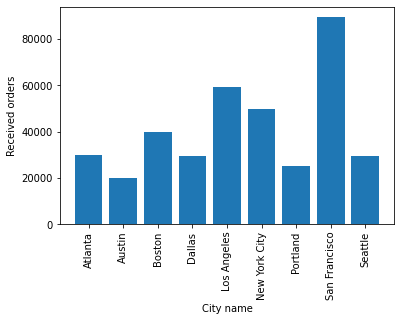

In [27]:
plt.bar(all_data.groupby('City')['City'].count().index,all_data.groupby('City')['City'].count())
plt.xticks(rotation=90)
plt.xlabel('City name')
plt.ylabel('Received orders')
plt.show()

<h2>Question:En quelle moment doit on faire une compagne publicitaire pour avoir plus de ventes ?</h2>

In [28]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

In [29]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [30]:
keys=[]
hours=[]
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
#nombre de commandes par heure
hours

[7820,
 4700,
 2486,
 1662,
 1708,
 2642,
 4964,
 8022,
 12512,
 17496,
 21888,
 24822,
 25174,
 24258,
 21968,
 20350,
 20768,
 21798,
 24560,
 25810,
 24456,
 21842,
 17644,
 12550]

Text(0, 0.5, 'nombre de commandes')

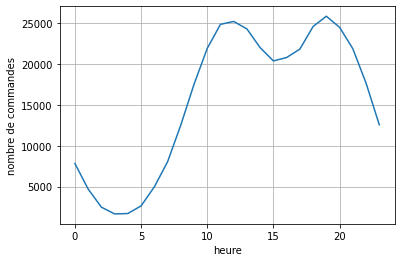

In [31]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('heure')
plt.ylabel('nombre de commandes')

### Réponse:On lance la compagne publicitaire entre 12AM et 19PM

<h2>Quel produit se vend le plus ?</h2>

In [32]:
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        62034
AA Batteries (4-pack)         55270
USB-C Charging Cable          47950
Lightning Charging Cable      46434
Wired Headphones              41114
Apple Airpods Headphones      31322
Bose SoundSport Headphones    26914
27in FHD Monitor              15100
iPhone                        13698
27in 4K Gaming Monitor        12488
34in Ultrawide Monitor        12398
Google Phone                  11064
Flatscreen TV                  9638
Macbook Pro Laptop             9456
ThinkPad Laptop                8260
20in Monitor                   8258
Vareebadd Phone                4136
LG Washing Machine             1332
LG Dryer                       1292
Name: Quantity Ordered, dtype: int64

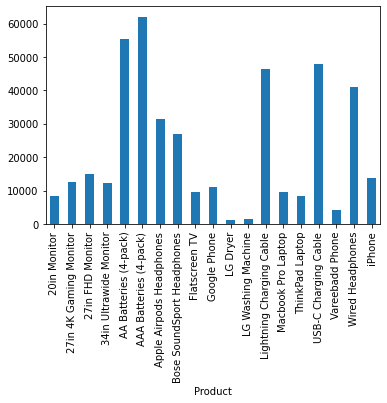

In [33]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [34]:
all_data.groupby('Product')['Price Each'].mean().sort_values()

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

In [35]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quatity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 4320x3600 with 0 Axes>

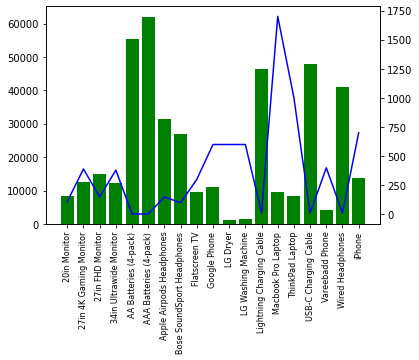

In [36]:
plt.figure(figsize=(60,50))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quatity,color='green')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation=90,size=8)

<h2>Question:Quelles sont les combinaisons de produits qui se vendent le plus ?</h2>

In [37]:
#all_data

In [38]:
#df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [39]:
#df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda p:','.join(p))

In [40]:
#df2=df.drop_duplicates(subset=['Order ID'])

In [41]:
#df2['Grouped'].value_counts()[0:5].plot.pie()